In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df_games= pd.read_csv('./data/games.csv')
df_teams = pd.read_csv('./data/teams.csv')
df_columns = ['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID','PTS_home', 'PTS_away', 'HOME_TEAM_WINS']
df = df_games[df_columns]
df.head()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,PTS_away,HOME_TEAM_WINS
0,22200477,1610612740,1610612759,126.0,117.0,1
1,22200478,1610612762,1610612764,120.0,112.0,1
2,22200466,1610612739,1610612749,114.0,106.0,1
3,22200467,1610612755,1610612765,113.0,93.0,1
4,22200468,1610612737,1610612741,108.0,110.0,0


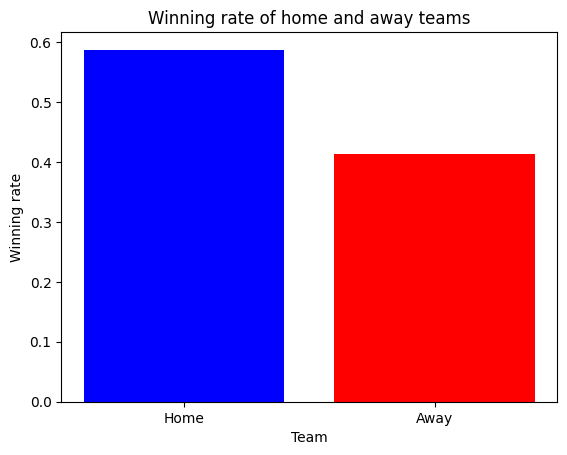

In [29]:
# ホームチームとアウェイチームの勝利数を集計する
home_wins = df["HOME_TEAM_WINS"].sum()
away_wins = len(df) - home_wins

# ホームチームとアウェイチームの勝率を計算する
home_rate = home_wins / len(df)
away_rate = away_wins / len(df)

# 棒グラフを描画する
plt.bar(["Home", "Away"], [home_rate, away_rate], color=["blue", "red"])
plt.title("Winning rate of home and away teams")
plt.xlabel("Team")
plt.ylabel("Winning rate")
plt.show()

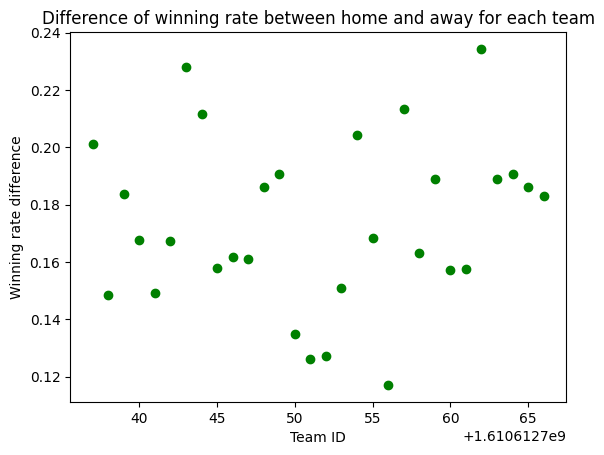

In [30]:
# チームごとにホームでの試合数と勝利数を集計する
home_games = df.groupby("HOME_TEAM_ID")["GAME_ID"].count()
home_wins = df.groupby("HOME_TEAM_ID")["HOME_TEAM_WINS"].sum()

# チームごとにアウェイでの試合数と勝利数を集計する
away_games = df.groupby("VISITOR_TEAM_ID")["GAME_ID"].count()
away_wins = away_games - df.groupby("VISITOR_TEAM_ID")["HOME_TEAM_WINS"].sum()

# チームごとにホームでの勝率とアウェイでの勝率を計算する
home_rate = home_wins / home_games
away_rate = away_wins / away_games

# チームごとにホームとアウェイでの勝率の差を求める
rate_diff = home_rate - away_rate

# 散布図を描画する
plt.scatter(home_rate.index, rate_diff, color="green")
plt.title("Difference of winning rate between home and away for each team")
plt.xlabel("Team ID")
plt.ylabel("Winning rate difference")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 説明変数をdataXに格納
dataX = df.drop([''], axis=1)

# 目的変数をdataYに格納
dataY = df['']

# データの分割を行う（学習用データ 0.8 評価用データ 0.2）
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)


## 学習

In [ ]:
from sklearn.linear_model import LogisticRegression

# 分類器を作成（ロジスティック回帰）
clf = LogisticRegression()

# 学習
clf.fit(X_train, y_train)

## 評価

In [ ]:
# 予測
y_pred = clf.predict(X_test)

# 正解率を表示
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
# 混同行列を表示
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred, labels=[1, 0]))

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))